# Saturating Forecasts

## Forecasting Growth

By default, Prophet uses a linear model for its forecast. When forecasts growth, there is usually some maximum achievale point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a logistic growth trend model, with a specifired carrying capacity. We illustrate this with the log number of page visits to the R page on Wikipedia:

In [7]:
import pandas as pd
from fbprophet import Prophet

In [8]:
df = pd.read_csv('./examples/example_wp_log_R.csv')

In [9]:
df['cap'] = 8.5

In [11]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capcity constant at the same value as in the history, and forecast 3 years into the futer:

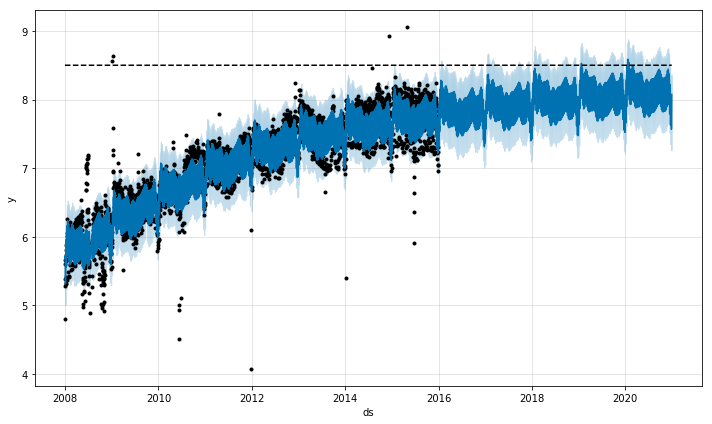

In [13]:
future = m.make_future_dataframe(periods=365*5)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)
fig

The logistic fucntion has an implicit minimum of 0, and will saturate at 0 the same way that is saturates at the capacity. It is possible to also specify a different saturating minumum.

## Saturating Minumum

The logistric growth model can also handle a saturaing minimum, which is specified with a column `floor` in the same way the `cap` column specified the maximum:

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
e:\4.sdk\miniconda3_64\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


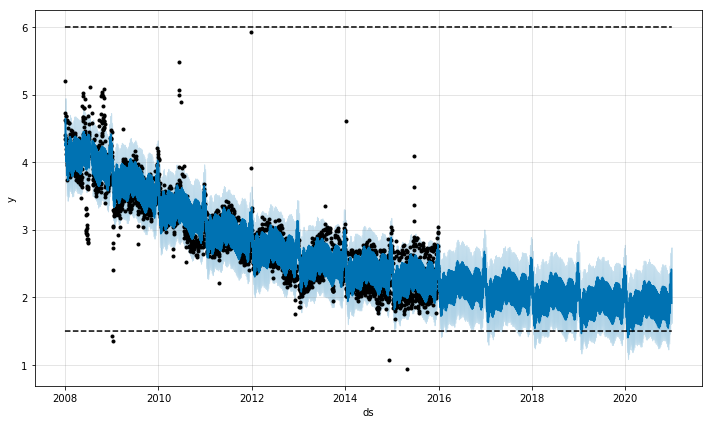

In [14]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)
fig

To use a logistic growth trend with a saturating minimum, a maximum capcaicty must also be specified.